# Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot
from matplotlib import pyplot as plt
import seaborn as sbn

In [3]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler,label_binarize
from sklearn.metrics import accuracy_score, log_loss

In [4]:
!pip3 install xgboost

In [5]:
from xgboost import XGBClassifier

In [6]:
from sklearn.model_selection import GridSearchCV

# Data Preparation

In [61]:
fileLocation = "C:/Users/antoi/Documents/ESILV/PyDataAnalysis/PROJET/Datasets/avila/"

features = ["F1", "F2", "F3", "F4", "F5", "F6", "F7", "F8", "F9", "F10"]
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'W', 'X', 'Y']
columnNames = features+["Authors"]

In [8]:
def fileToDf(fileLocation, fileName, labels):
    df= pd.read_csv(fileLocation+fileName, sep=",", header=None)
    df.columns= labels
    return df

In [9]:
df_train = fileToDf(fileLocation,"avila-tr.txt", columnNames)
df_test = fileToDf(fileLocation,"avila-ts.txt", columnNames)

In [10]:
df_train.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Authors
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


## Data Vizualisation

C:\Users\antoi\MyApps\MyAnaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


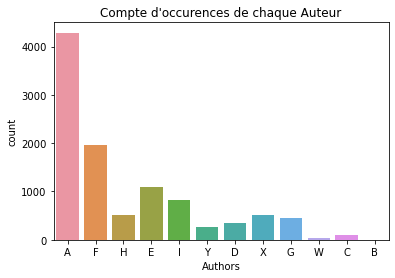

In [11]:
sbn.countplot(df_train['Authors'],label="Count")
plt.title("Compte d'occurences de chaque Auteur")
plt.show()

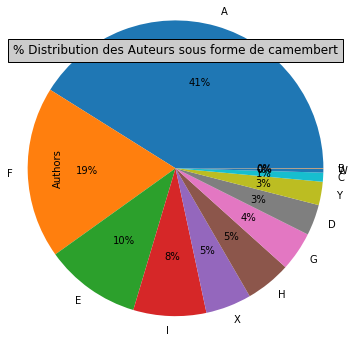

In [12]:
df_train.Authors.value_counts().plot(kind='pie', autopct='%1.0f%%', radius=1.7)
plt.title("% Distribution des Auteurs sous forme de camembert", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

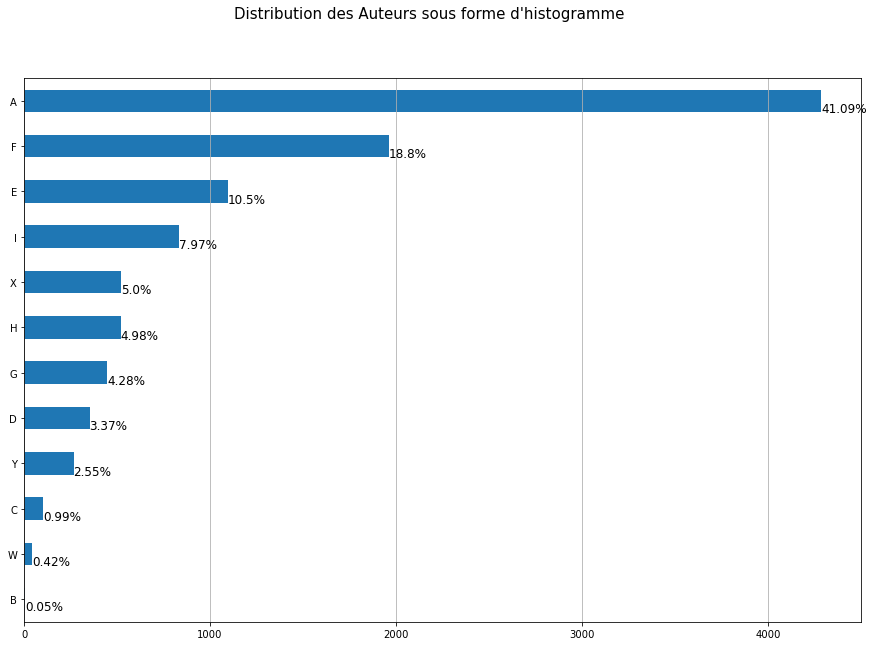

In [13]:
plt.figure(figsize = (15,10))
ax = df_train["Authors"].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
    total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width(), i.get_y(), 
    str(round((i.get_width()/total)*100, 2))+'%', 
    fontsize=12, color='black')
ax.grid(axis="x")

plt.suptitle("Distribution des Auteurs sous forme d'histogramme", fontsize=15)
plt.show()

In [14]:
df_train.describe()[1:8]

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
mean,0.000852,0.033611,-0.000525,-0.002387,0.006370,0.013973,0.005605,0.010323,0.012914,0.000818
std,0.991431,3.920868,1.120202,1.008527,0.992053,1.126245,1.313754,1.003507,1.087665,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541992,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654944,0.500624,0.530855
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232


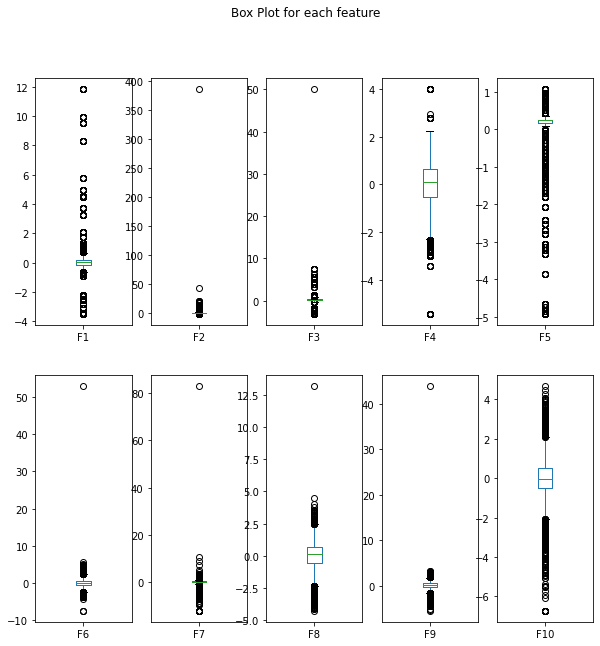

In [15]:
df_train.drop('Authors', axis=1).plot(kind='box', subplots=True, layout=(2,5), figsize=(10,10), 
                                        title='Box Plot for each feature')
plt.show()

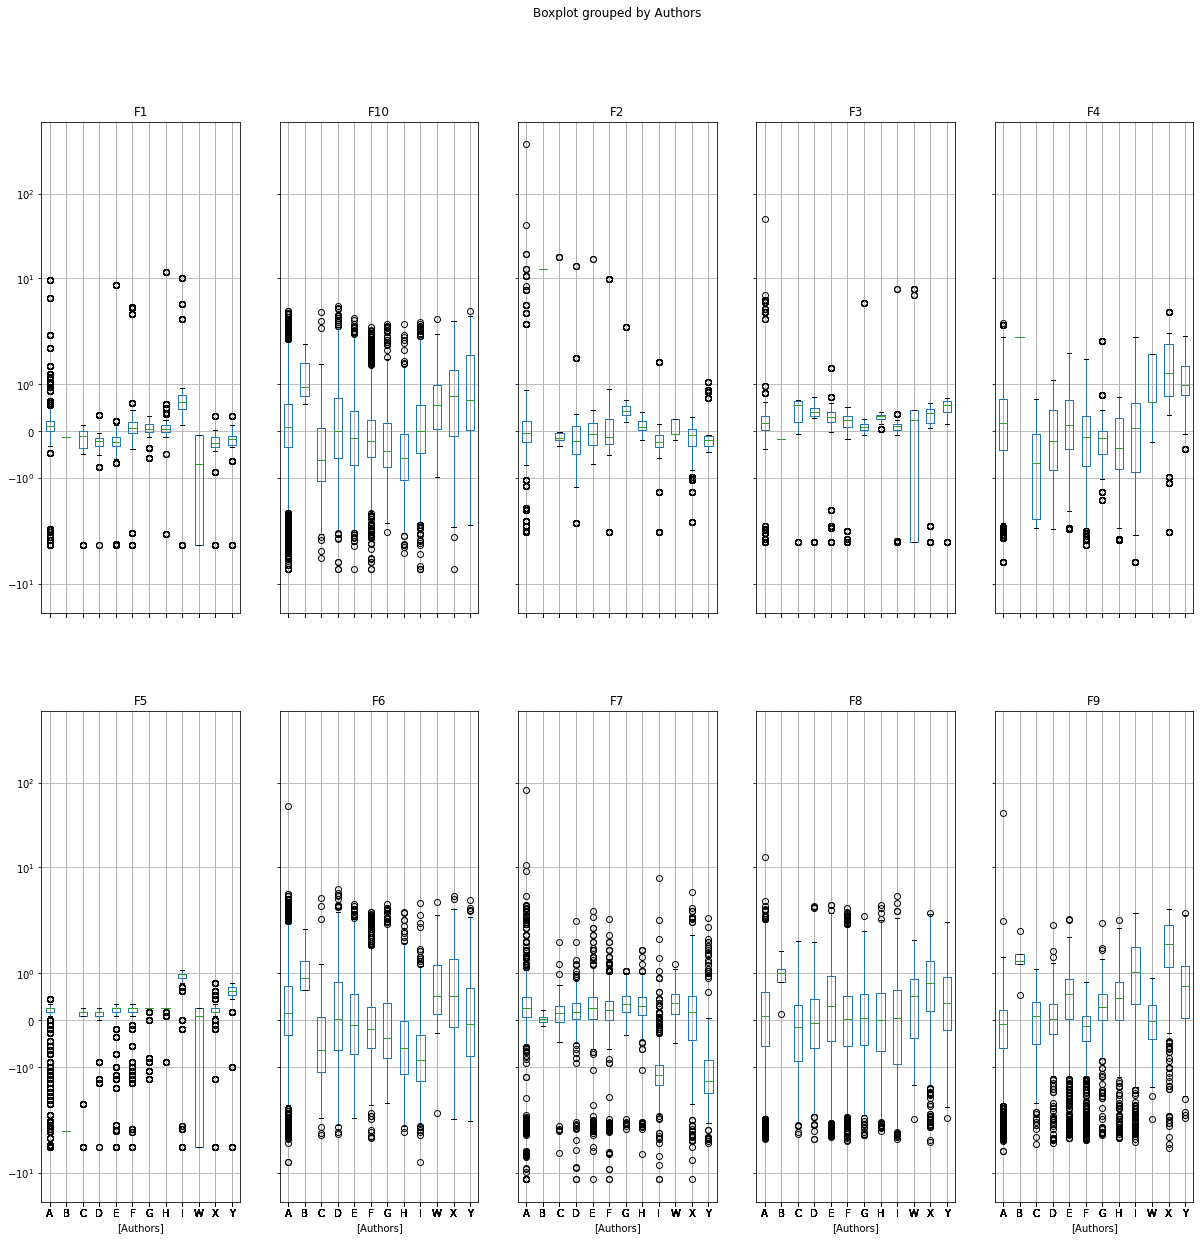

In [16]:
df_train.boxplot(by="Authors",layout=(2,5), figsize=(20,20))
plt.yscale('symlog')
plt.show()

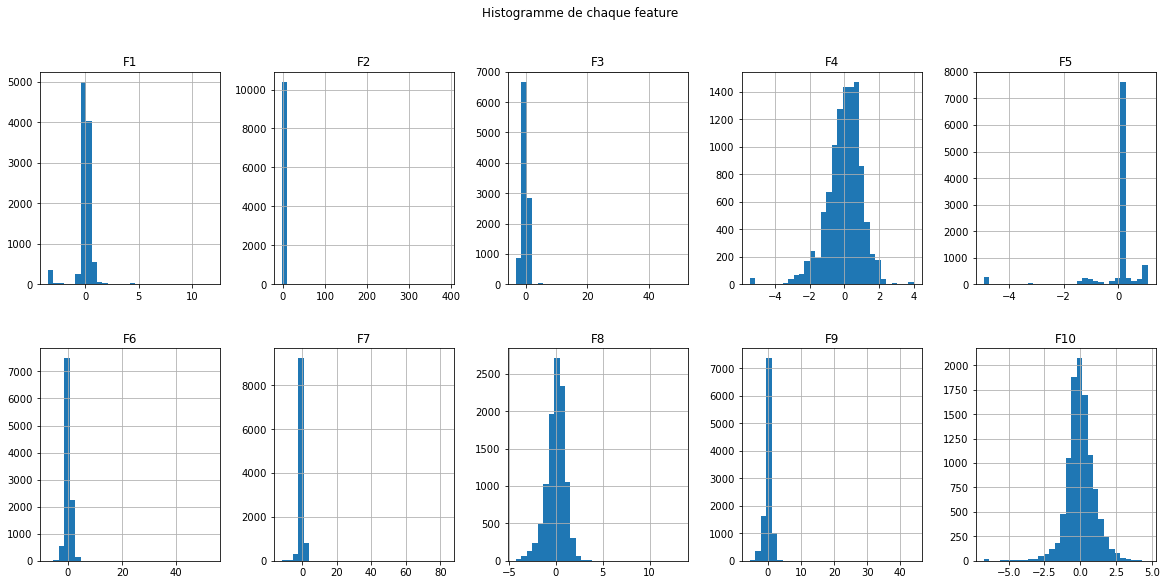

In [17]:
df_train.drop('Authors' ,axis=1).hist(bins=30,layout=(2,5), figsize=(20,9))
plt.suptitle("Histogramme de chaque feature")
plt.show()
# f4, f8 et f10 semblent suivre une distribution gaussienne

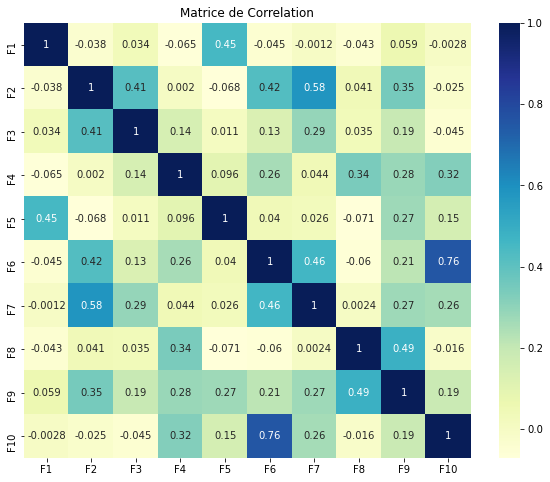

In [18]:
# Matrice de corrélation entre les données
corrMatrix = df_train.corr()
plt.figure(figsize = (10,8))
sbn.heatmap(corrMatrix, annot=True,cmap='YlGnBu')
plt.title("Matrice de Correlation")
plt.show()

In [19]:
# Corelations des features avec les Auteurs
df= df_train
df["Authors"] =df["Authors"].astype('category').cat.codes
corrToTarget= df[df.columns[0:]].corr()["Authors"][:]
print(corrToTarget)

F1         0.029618
F2        -0.021313
F3         0.060896
F4         0.100635
F5         0.174421
F6        -0.141145
F7        -0.162221
F8         0.062925
F9         0.343334
F10        0.036942
Authors    1.000000
Name: Authors, dtype: float64


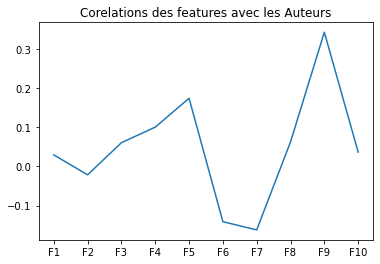

In [20]:
plt.title("Corelations des features avec les Auteurs")
plt.plot(corrToTarget[0:-1])
plt.show()

# Models

In [21]:
array = df_train.values

# Preparation de X (valeurs des features) & y (valeurs cibles/classes)
X = array[:,0:10]
Y = array[:,10]

### Choix de modèles

In [22]:
# preparation des modèles avec hyperparamètres par défaut (excepté pour LR & XGB pour éviter certains warnings)
models = []
models.append(('LR', LogisticRegression(max_iter=1000))) 
#models.append(('GBC', GradientBoostingClassifier()))
models.append(('XGBC', XGBClassifier(use_label_encoder=False, eval_metric = "logloss")))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RFC', RandomForestClassifier()))

In [23]:
# utilisation de cross-validation pur évaluer les modèles
results = []
selectedModels = []
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits=5) #on choisit 5 car c'est le compte de la classe la moins presente ("B")
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    mean= cv_results.mean()
    std= cv_results.std()
    print("\nModel name: ",name)
    print("Results -->       ", "Mean Accuracy: ", mean, "  Standart Deviation Accuracy: ", std)
    if(mean>0.7):
        selectedModels.append([name,model])


Model name:  LR
Results -->        Mean Accuracy:  0.5611697027804411   Standart Deviation Accuracy:  0.00522157192874021

Model name:  XGBC
Results -->        Mean Accuracy:  0.9955896452540747   Standart Deviation Accuracy:  0.0007670182166826273

Model name:  KNN
Results -->        Mean Accuracy:  0.7246404602109301   Standart Deviation Accuracy:  0.008847763754599699

Model name:  DTC
Results -->        Mean Accuracy:  0.9627037392138064   Standart Deviation Accuracy:  0.004418684035207255

Model name:  GNB
Results -->        Mean Accuracy:  0.3021093000958773   Standart Deviation Accuracy:  0.011965084684925732

Model name:  SVM
Results -->        Mean Accuracy:  0.6685522531160115   Standart Deviation Accuracy:  0.01987367363772737

Model name:  RFC
Results -->        Mean Accuracy:  0.9790987535953979   Standart Deviation Accuracy:  0.002869919376240814


In [24]:
modelNames= []
for model in models:
    modelNames.append(model[0])

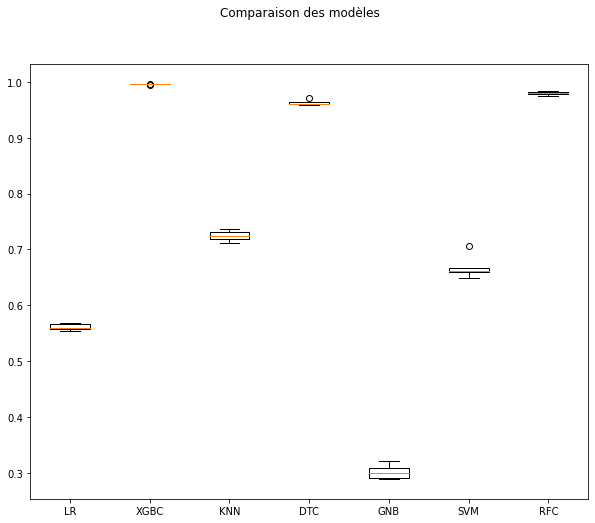

In [25]:
# comparaison des algos sous forme de boites à moustaches
fig = plt.figure(figsize = (10,8))
fig.suptitle('Comparaison des modèles')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(modelNames)
plt.show()

### Tuning des modèles choisis / Grilles de recherches

In [26]:
# Suite à notre précédente évaluation des modèles avec leurs paramètres par défaut
# On choisit de retenir ceux avec une précision moyenne supérieur à 0.6 (selectedModels)
# c'est à dire:  XGBC, KNN, DTC, SVM et RFC

# Nous faisons d'abord une petite inspection des hyperparamètres disponibles pour chacun
for name, model in selectedModels:
    print("\nModel name:", name)
    print("--> Hyperparameters: ")
    for key in model.get_params().keys():
        print("\t\t\t-",key)
    


Model name: XGBC
--> Hyperparameters: 
			- objective
			- use_label_encoder
			- base_score
			- booster
			- colsample_bylevel
			- colsample_bynode
			- colsample_bytree
			- gamma
			- gpu_id
			- importance_type
			- interaction_constraints
			- learning_rate
			- max_delta_step
			- max_depth
			- min_child_weight
			- missing
			- monotone_constraints
			- n_estimators
			- n_jobs
			- num_parallel_tree
			- random_state
			- reg_alpha
			- reg_lambda
			- scale_pos_weight
			- subsample
			- tree_method
			- validate_parameters
			- verbosity
			- eval_metric

Model name: KNN
--> Hyperparameters: 
			- algorithm
			- leaf_size
			- metric
			- metric_params
			- n_jobs
			- n_neighbors
			- p
			- weights

Model name: DTC
--> Hyperparameters: 
			- ccp_alpha
			- class_weight
			- criterion
			- max_depth
			- max_features
			- max_leaf_nodes
			- min_impurity_decrease
			- min_impurity_split
			- min_samples_leaf
			- min_samples_split
			- min_weight_fraction_leaf
			- preso

#### KNN

In [27]:
# Paramètres que l'on va faire varier
k_range = list(range(1, 16))
weight_options = ['uniform', 'distance']

parameterGrid = dict(n_neighbors=k_range, weights=weight_options)

In [28]:
# Grid Search
grid_KNN = GridSearchCV(KNeighborsClassifier(), parameterGrid, cv=5, scoring='accuracy')
grid_KNN.fit(X, Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [29]:
# Fonction d'affichage propre des résultats de cross validation selon les paramètres
def resultEvolution( grid_cvResults ):    
    mean_scores= grid_cvResults["mean_test_score"]
    std_scores= grid_cvResults["std_test_score"]
    params= grid_cvResults["params"]
    for i in range( len(grid_cvResults["params"])):
        print("\nParameters: ", grid_cvResults["params"][i], "\n-->  mean:", mean_scores[i]," std:",std_scores[i])

In [30]:
# Affichage de l'évolution des résultats en fonction des paramètres
resultEvolution(grid_KNN.cv_results_)


Parameters:  {'n_neighbors': 1, 'weights': 'uniform'} 
-->  mean: 0.7436241610738256  std: 0.005967542212692412

Parameters:  {'n_neighbors': 1, 'weights': 'distance'} 
-->  mean: 0.7436241610738256  std: 0.005967542212692412

Parameters:  {'n_neighbors': 2, 'weights': 'uniform'} 
-->  mean: 0.7219558964525408  std: 0.005871260169662466

Parameters:  {'n_neighbors': 2, 'weights': 'distance'} 
-->  mean: 0.7436241610738256  std: 0.005967542212692412

Parameters:  {'n_neighbors': 3, 'weights': 'uniform'} 
-->  mean: 0.7312559923298179  std: 0.005247912630260375

Parameters:  {'n_neighbors': 3, 'weights': 'distance'} 
-->  mean: 0.7428571428571429  std: 0.0052653998917530235

Parameters:  {'n_neighbors': 4, 'weights': 'uniform'} 
-->  mean: 0.7204218600191755  std: 0.008442646198562328

Parameters:  {'n_neighbors': 4, 'weights': 'distance'} 
-->  mean: 0.7448705656759348  std: 0.005272378556037392

Parameters:  {'n_neighbors': 5, 'weights': 'uniform'} 
-->  mean: 0.7258868648130392  std:

In [31]:
def plot_gridSearch(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Score de Grille de Recherche", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc=(1.04,0), fontsize=15)
    ax.grid('on')


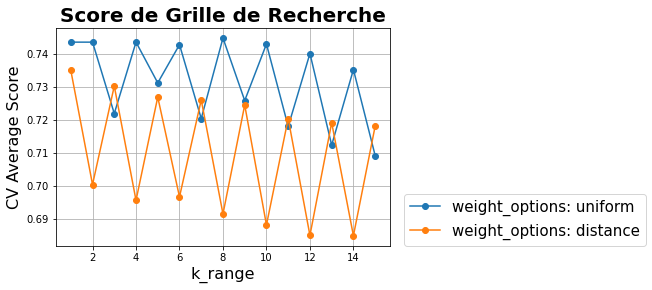

In [32]:
plot_gridSearch(grid_KNN.cv_results_, k_range, weight_options, 'k_range', 'weight_options')

In [35]:
# Meilleur score obtenu
# ainsi que paramètres pour lequel le modèle est optimisé
print("Best score: ",grid_KNN.best_score_)
print("Optimal parameters: ", grid_KNN.best_params_)

Best score:  0.7448705656759348
Optimal parameters:  {'n_neighbors': 4, 'weights': 'distance'}


In [36]:
# modèle KNN final:
optimalKNN = KNeighborsClassifier(n_neighbors=4, weights= 'distance' )

#### XGBC

In [37]:
# Paramètres que l'on va faire varier: étape 1

max_depth= range(3,10,2)
min_child_weight= range(1,6,2)
    
# grille de paramètres
parameterGrid_XGBC = dict(
                        max_depth= max_depth,
                        min_child_weight=min_child_weight
                       )

In [38]:
# Grid Search XGBC
grid_XGBC = GridSearchCV(XGBClassifier(use_label_encoder=False, 
                                          eval_metric = "logloss",
                                          learning_rate=0.1,
                                          n_estimators=100
                                      ),
                         parameterGrid_XGBC, 
                         cv=5, 
                         scoring='accuracy')
grid_XGBC.fit(X, Y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=N

Best score:  0.9938638542665389
Optimal parameters:  {'max_depth': 9, 'min_child_weight': 1}


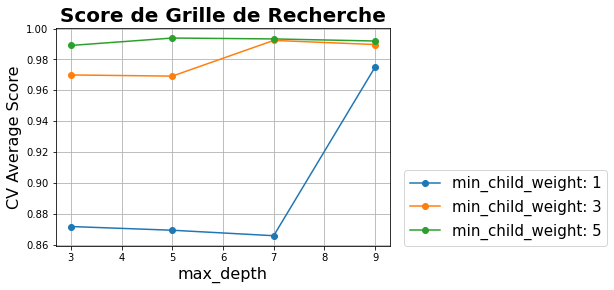

In [39]:
plot_gridSearch(grid_XGBC.cv_results_, max_depth, min_child_weight, 'max_depth', 'min_child_weight')

# Meilleur score obtenu
# ainsi que paramètres pour lequel le modèle est optimisé
print("Best score: ",grid_XGBC.best_score_)
print("Optimal parameters: ", grid_XGBC.best_params_)

In [40]:
# Paramètres que l'on va faire varier: étape 2

gamma = [i/10.0 for i in range(0,5)]
reg_alpha=[1e-5, 1e-2, 0.1, 1, 100]

parameterGrid_XGBC = dict(
                        gamma= gamma,
                        reg_alpha=reg_alpha
                       )

# On fixe les meilleurs paramètres précedents et on en teste les nouveaux
# Grid Search XGBC
grid_XGBC = GridSearchCV(
                            XGBClassifier(use_label_encoder=False, 
                                          eval_metric = "logloss",
                                          learning_rate=0.1,
                                          n_estimators=100,
                                          max_depth= 9,
                                          min_child_weight=1
                                         ),
                         parameterGrid_XGBC, 
                         cv=5, 
                         scoring='accuracy')
grid_XGBC.fit(X, Y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=9, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
 

Best score:  0.9942473633748803
Optimal parameters:  {'gamma': 0.1, 'reg_alpha': 0.1}


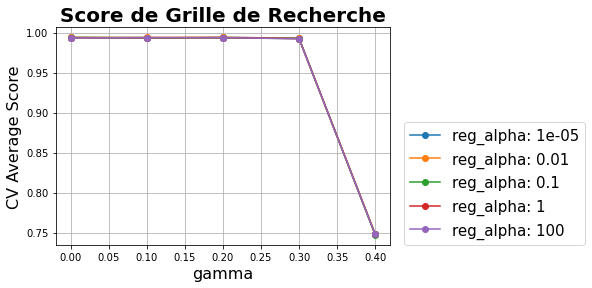

In [41]:
plot_gridSearch(grid_XGBC.cv_results_, gamma, reg_alpha, 'gamma', 'reg_alpha')

# Meilleur score obtenu
# ainsi que paramètres pour lequel le modèle est optimisé
print("Best score: ",grid_XGBC.best_score_)
print("Optimal parameters: ", grid_XGBC.best_params_)

In [42]:
# Paramètres que l'on va faire varier: étape 3

subsample= [i/10.0 for i in range(6,10)]
colsample_bytree= [i/10.0 for i in range(6,10)]

parameterGrid_XGBC = dict(
                        subsample= subsample,
                        colsample_bytree=colsample_bytree
                       )

# On fixe les meilleurs paramètres précedents et on en teste les nouveaux
# Grid Search XGBC
grid_XGBC = GridSearchCV(
                            XGBClassifier(use_label_encoder=False, 
                                          eval_metric = "logloss",
                                          learning_rate=0.1,
                                          n_estimators=100,
                                          max_depth= 9,
                                          min_child_weight=1,
                                          gamma= 0.1,
                                          reg_alpha= 0.1
                                          
                                         ),
                         parameterGrid_XGBC, 
                         cv=5, 
                         scoring='accuracy')
grid_XGBC.fit(X, Y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=0.1,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=9, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=0.1, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
   

Best score:  0.9962607861936721
Optimal parameters:  {'colsample_bytree': 0.6, 'subsample': 0.9}


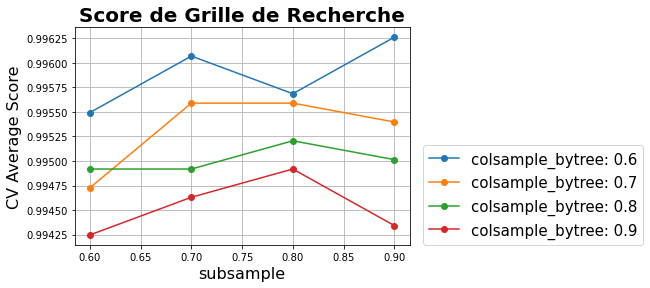

In [43]:
plot_gridSearch(grid_XGBC.cv_results_, subsample, colsample_bytree, 'subsample', 'colsample_bytree')

# Meilleur score obtenu
# ainsi que paramètres pour lequel le modèle est optimisé
print("Best score: ",grid_XGBC.best_score_)
print("Optimal parameters: ", grid_XGBC.best_params_)

In [44]:
# Paramètres que l'on va faire varier: étape 4

n_estimators= [25, 50, 100, 250, 500]
learning_rate= [0.5, 0.1, 0.05, 0.01]

parameterGrid_XGBC = dict(
                        n_estimators= n_estimators,
                        learning_rate=learning_rate
                       )

# On fixe les meilleurs paramètres précedents et on en teste les nouveaux
# Grid Search XGBC
grid_XGBC = GridSearchCV(
                            XGBClassifier(use_label_encoder=False, 
                                          eval_metric = "logloss",
                                          max_depth= 9,
                                          min_child_weight=1,
                                          gamma= 0.1,
                                          reg_alpha= 0.1
                                          
                                         ),
                         parameterGrid_XGBC, 
                         cv=5, 
                         scoring='accuracy')
grid_XGBC.fit(X, Y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=0.1,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=9, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=0.1, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
  

Best score:  0.9950143815915627
Optimal parameters:  {'learning_rate': 0.1, 'n_estimators': 250}


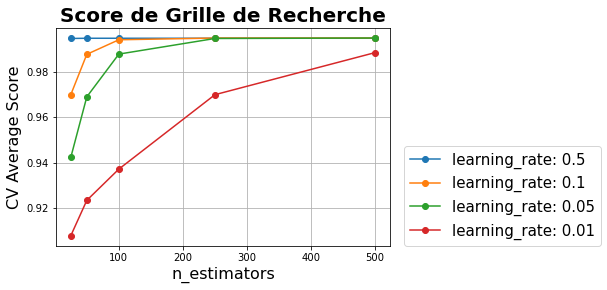

In [45]:
plot_gridSearch(grid_XGBC.cv_results_,  n_estimators, learning_rate, 'n_estimators','learning_rate')

# Meilleur score obtenu
# ainsi que paramètres pour lequel le modèle est optimisé
print("Best score: ",grid_XGBC.best_score_)
print("Optimal parameters: ", grid_XGBC.best_params_)

In [46]:
# modèle XGB final:
optimalXGBC= XGBClassifier(use_label_encoder=False, 
                                          eval_metric = "logloss",
                                          learning_rate=0.1,
                                          n_estimators=250,
                                          max_depth= 9,
                                          min_child_weight=1,
                                          gamma= 0.1,
                                          reg_alpha= 0.1,
                                          colsample_bytree=0.6,
                                          subsample= 0.9
                                        )

#### DTC

In [47]:
# Paramètres que l'on va faire varier: étape 1

max_depth = range(1,11)
max_features= ['auto', 'sqrt', 'log2']

parameterGrid_DTC = dict(
                        max_depth= max_depth,
                        max_features=max_features
                       )

# Grid Search DTC
grid_DTC = GridSearchCV(DecisionTreeClassifier(), parameterGrid_DTC, cv=5, scoring='accuracy')
grid_DTC.fit(X, Y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 11),
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

Best score:  0.7442953020134228
Optimal parameters:  {'max_depth': 10, 'max_features': 'log2'}


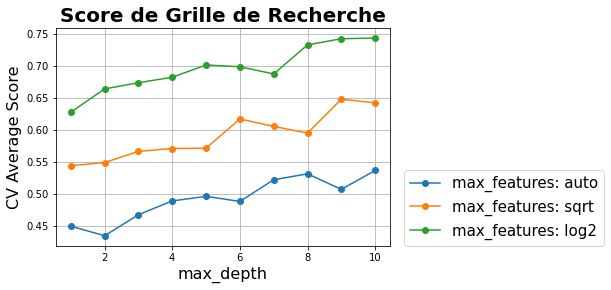

In [48]:
plot_gridSearch(grid_DTC.cv_results_, max_depth, max_features, 'max_depth', 'max_features')

# Meilleur score obtenu
# ainsi que paramètres pour lequel le modèle est optimisé
print("Best score: ",grid_DTC.best_score_)
print("Optimal parameters: ", grid_DTC.best_params_)

In [49]:
# Paramètres que l'on va faire varier: étape 2
min_samples_split= range(2,5)
criterion =['gini','entropy']

parameterGrid_XGBC = dict(
                        min_samples_split= min_samples_split,
                        criterion=criterion
                       )

# Grid Search DTC
grid_DTC = GridSearchCV(DecisionTreeClassifier(max_depth= 10,
                                               max_features='log2'
                                              ),
                        parameterGrid_XGBC, 
                        cv=5, 
                        scoring='accuracy')
grid_DTC.fit(X, Y)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=10,
                                              max_features='log2'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': range(2, 5)},
             scoring='accuracy')

Best score:  0.765771812080537
Optimal parameters:  {'criterion': 'entropy', 'min_samples_split': 4}


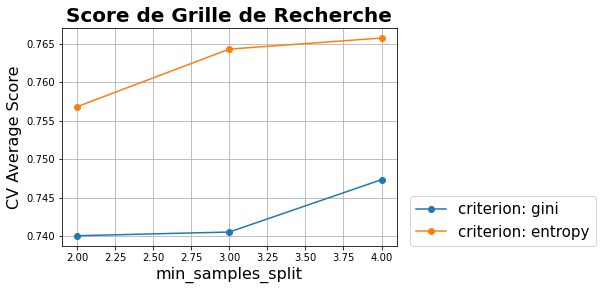

In [50]:
plot_gridSearch(grid_DTC.cv_results_, min_samples_split, criterion, 'min_samples_split', 'criterion')

# Meilleur score obtenu
# ainsi que paramètres pour lequel le modèle est optimisé
print("Best score: ",grid_DTC.best_score_)
print("Optimal parameters: ", grid_DTC.best_params_)

In [51]:
optimalDTC= DecisionTreeClassifier(max_depth= 10,max_features='log2', criterion='entropy', min_samples_split=2)

#### RFC

In [52]:
# Paramètres que l'on va faire varier: étape 1

n_estimators= [25, 50, 100, 250, 500]
max_features=['auto', 'sqrt', 'log2']

parameterGrid_grid_RFC = dict(
                        n_estimators= n_estimators,
                        max_features=max_features
                       )

# Grid Search RFC
grid_RFC = GridSearchCV(RandomForestClassifier(max_depth= 10), parameterGrid_grid_RFC, cv=5, scoring='accuracy')
grid_RFC.fit(X, Y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [25, 50, 100, 250, 500]},
             scoring='accuracy')

Best score:  0.8642377756471717
Optimal parameters:  {'max_features': 'auto', 'n_estimators': 500}


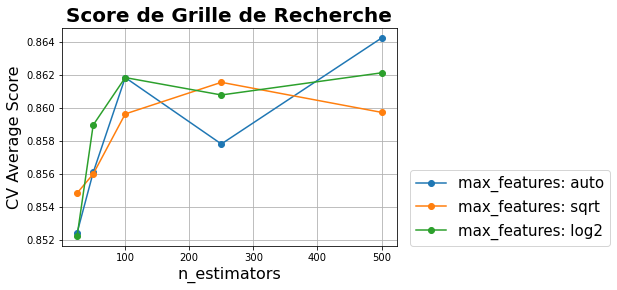

In [53]:
plot_gridSearch(grid_RFC.cv_results_, n_estimators, max_features, 'n_estimators', 'max_features')

# Meilleur score obtenu
# ainsi que paramètres pour lequel le modèle est optimisé
print("Best score: ",grid_RFC.best_score_)
print("Optimal parameters: ", grid_RFC.best_params_)

In [54]:
optimalRFC= RandomForestClassifier(max_depth= 10, max_features='auto', n_estimators=50)

### Comparaison des résultats de chaque modèle

In [55]:
df_train_temp = fileToDf(fileLocation,"avila-tr.txt", columnNames)
df_test_temp= fileToDf(fileLocation,"avila-ts.txt", columnNames)


df_test_temp["Authors"] =df_test_temp["Authors"].astype('category').cat.codes
array_test = df_test_temp.values

X_test = array_test[:,0:10]
Y_test = array_test[:,10]

In [56]:
def featureImportance(fittedModel):
    # get importances
    importances = fittedModel.feature_importances_

    for i,v in enumerate(importances):
        print('Feature: %0d, Score: %.3f' % (i,v))

    print ("Importances des features:")
    pyplot.bar([x for x in range(len(importances))], importances)
    plt.xticks(range(X.shape[1]), features)
    pyplot.show()

In [57]:
def fitAndEvaluate(model, X_train, Y_train, X_test,  Y_test):
    model.fit(X_train, Y_train)
    
    featureImportance(model)
    
    print ("Accuracy on training set:")
    print (model.score(X_train, Y_train))
    print ("Accuracy on testing set:")
    print (model.score(X_test, Y_test))
    Y_pred = model.predict(X_test)
    print ("Classification Report:")
    print (metrics.classification_report(Y_test, Y_pred))
    
    print ("Confusion Matrix:")
    plt.figure(figsize = (15,5))
    corrMatrix=metrics.confusion_matrix(Y_test, Y_pred)
    sbn.heatmap(corrMatrix, annot=True,cmap='Greens', xticklabels=classes, yticklabels=classes)
    plt.xlabel("Classe prédite", fontsize=20, fontweight='bold') 
    plt.ylabel("Classe réelle", fontsize=20, fontweight='bold') 

In [58]:
seed = 42
optimalXGBC.random_state= seed
optimalXGBC.eval_metric = 'mlogloss'
optimalXGBC.objective = 'multi:softmax'
optimalXGBC.num_class=12
optimalDTC.random_state= seed
optimalRFC.random_state= seed

In [59]:
classifiers =[["KNN",optimalKNN],
               ["XGBC",optimalXGBC],
               ["DTC",optimalDTC],
               ["RTC",optimalRFC]]

Feature: 0, Score: 0.117
Feature: 1, Score: 0.085
Feature: 2, Score: 0.087
Feature: 3, Score: 0.076
Feature: 4, Score: 0.189
Feature: 5, Score: 0.083
Feature: 6, Score: 0.093
Feature: 7, Score: 0.041
Feature: 8, Score: 0.190
Feature: 9, Score: 0.038
Importances des features:


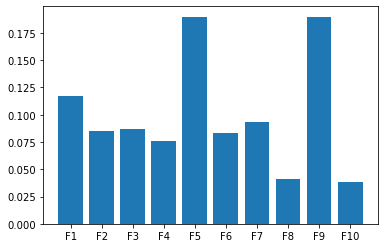

Accuracy on training set:
1.0
Accuracy on testing set:
0.9987544313500047
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4286
         1.0       1.00      1.00      1.00         5
         2.0       0.97      1.00      0.99       103
         3.0       1.00      1.00      1.00       353
         4.0       1.00      1.00      1.00      1095
         5.0       1.00      1.00      1.00      1962
         6.0       1.00      1.00      1.00       447
         7.0       1.00      0.99      1.00       520
         8.0       1.00      1.00      1.00       832
         9.0       1.00      1.00      1.00        45
        10.0       1.00      0.99      0.99       522
        11.0       0.99      1.00      0.99       267

    accuracy                           1.00     10437
   macro avg       1.00      1.00      1.00     10437
weighted avg       1.00      1.00      1.00     10437

Confusion Matrix:


NameError: name 'classes' is not defined

<Figure size 1080x360 with 0 Axes>

In [60]:
fitAndEvaluate(optimalXGBC, X, Y, X_test,  Y_test)

In [ ]:
fitAndEvaluate(optimalDTC, X, Y, X_test,  Y_test)

In [ ]:
fitAndEvaluate(optimalRFC, X, Y, X_test,  Y_test)

In [ ]:
# Comparaison simplifiée
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for name, clf in classifiers:
    clf.fit(X, Y)
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(Y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(Y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

In [ ]:
sbn.set_color_codes("dark")
sbn.barplot(x='Accuracy', y='Classifier', data=log)

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy', fontsize=20, fontweight='bold')
plt.show()

sbn.set_color_codes("dark")
sbn.barplot(x='Log Loss', y='Classifier', data=log)

plt.xlabel('Log Loss')
plt.title('Perte du Journal', fontsize=20, fontweight='bold')
plt.show()

##### XBGC est clairement le grand gagant parmis les modèles :) !

# Exportation of best model

In [ ]:
bestCLF


In [ ]:
bestCLF= XGBClassifier(use_label_encoder=False, 
                                          eval_metric = "logloss",
                                          learning_rate=0.1,
                                          n_estimators=250,
                                          max_depth= 9,
                                          min_child_weight=1,
                                          gamma= 0.1,
                                          reg_alpha= 0.1,
                                          colsample_bytree=0.6,
                                          subsample= 0.9
                                        )

In [ ]:
bestModel= bestCLF.fit(X, Y)

In [ ]:
import pickle
pickl = {
    'model': bestModel
}
pickle.dump( pickl, open( 'MyModel' + ".p", "wb" ) )